In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Writing and Cleaning

In [2]:
df = pd.read_csv("all_data.csv")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Drop NaN values

In [3]:
## Check NaN Value by isna() and sum() method
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Drop Duplicate column title in row

In [6]:
df[df["Order ID"] == "Order ID"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
## Method 1 By using drop column
df = df.drop(df[df["Order ID"] == "Order ID"].index)

In [8]:
## Method 2

# df = df[df["Order ID"] != "Order ID"]

In [9]:
df["Product"].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [10]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Convert columns to the correct type

In [11]:
## Check the columns type

In [12]:
## String
df.select_dtypes(include=["object"])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [13]:
## Number
df.select_dtypes(include=["number"])

""
0
2
3
4
5
...
186845
186846
186847
186848


In [14]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])

In [15]:
df.select_dtypes(include=["number"])

,Quantity Ordered,Price Each
0,2,11.95
2,1,99.99
3,1,600.00
4,1,11.99
5,1,11.99
...,...,...
186845,3,2.99
186846,1,700.00
186847,1,700.00
186848,1,379.99


## Additional Column

### Add month column

In [16]:
df["Month"] = df["Order Date"].str[0:2].astype("int32")

In [17]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [18]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Add City Column

In [19]:
df["City"] = df["Purchase Address"].apply(lambda x: f"{x.split(',')[1]} ({x.split(',')[2].split()[0]})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Convert "Order Date" to Pandas DateTime Object

In [20]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%m/%d/%y %H:%M")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Add Hour  Column 

In [21]:
df["Hour"] = df["Order Date"].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


## Questions

### Q1 What was the best month for sales? How much was earned that month?

In [22]:
df.groupby("Month").sum()["Sales"].loc[12]

4613443.340001534

In [23]:
## EXTRA: Suppress the scientific notation
df.groupby("Month").sum()["Sales"].apply(lambda x: '%.17f' % x)

Month
1     1822256.72999991406686604
2     2202022.41999996360391378
3     2807100.38000036031007767
4     3390670.24000070383772254
5     3152606.75000055320560932
6     2577802.26000017812475562
7     2647775.76000023772940040
8     2244467.87999999430030584
9     2097560.12999989092350006
10    3736726.88000097032636404
11    3199603.20000058878213167
12    4613443.34000153373926878
Name: Sales, dtype: object

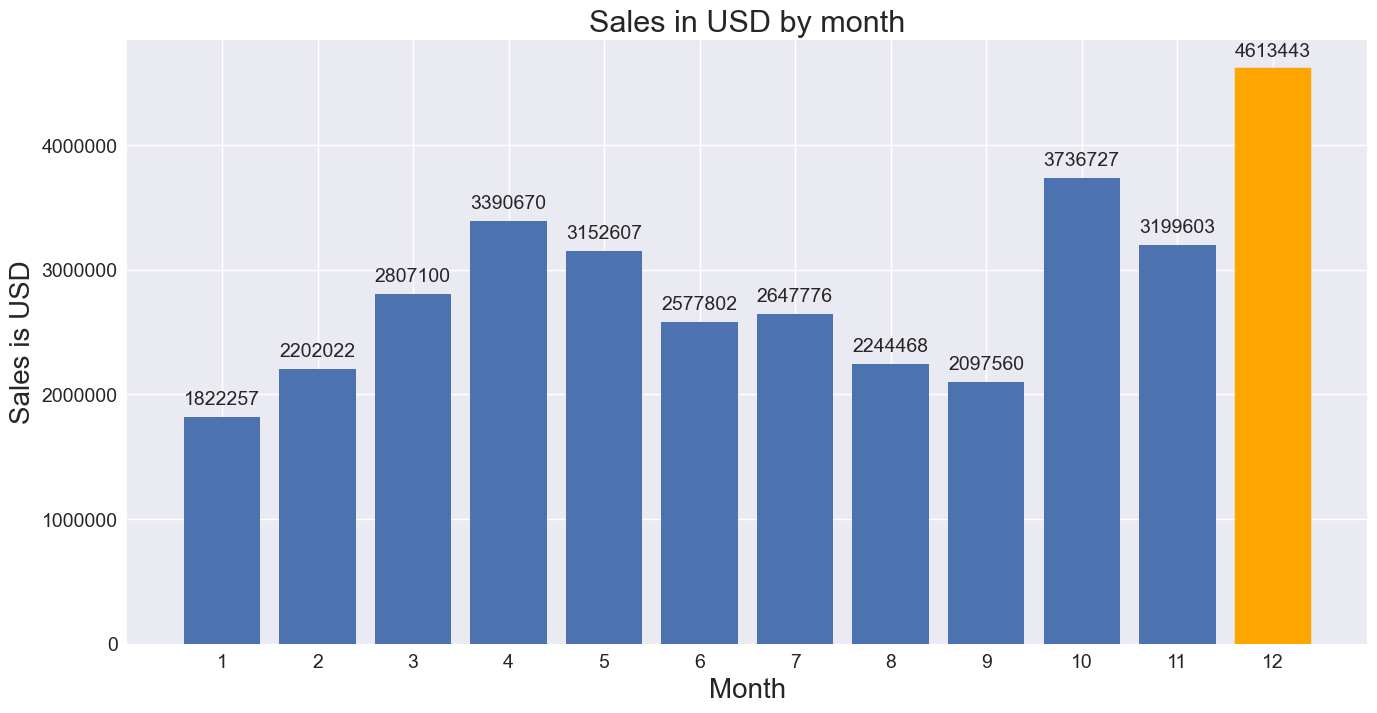

In [24]:
## Graphical Analysis

x = range(1,13)
y = df.groupby("Month").sum()["Sales"]

plt.style.use("seaborn")
plt.figure(figsize=(16,8),dpi=100)

bar = plt.bar(x,y)
bar[-1].set_color("orange")

## Format Setting
plt.ticklabel_format(style='plain') ## Disable scientific notation

## Title & Axis Setting
plt.xticks(x)
plt.tick_params(labelsize=14)
plt.xlabel("Month", fontsize=20)
plt.ylabel("Sales is USD", fontsize=20)
plt.title("Sales in USD by month",fontsize=22)

## Chart Labelling
for x,y in zip(x,y):
    plt.text(x-0.4,y+100000,s=round(y),fontsize=14)

plt.show()

### Answer for Q1 

In [25]:
month_top_sales = df.groupby("Month").sum()["Sales"].idxmax()

print(f"The best month for sales is: {month_top_sales}")
print("The sales amount is: $" + str(round(df.groupby("Month").sum()["Sales"].loc[month_top_sales],2)))

print("Reason of December achieved top sales: Year end holiday, Year end bonus payout, etc.")

The best month for sales is: 12
The sales amount is: $4613443.34
Reason of December achieved top sales: Year end holiday, Year end bonus payout, etc.


### Q2 What city had the highest number of sales?

In [26]:
df.groupby("City").sum()["Sales"]

City
 Atlanta (GA)          2.795499e+06
 Austin (TX)           1.819582e+06
 Boston (MA)           3.661642e+06
 Dallas (TX)           2.767975e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Portland (ME)         4.497583e+05
 Portland (OR)         1.870732e+06
 San Francisco (CA)    8.262204e+06
 Seattle (WA)          2.747755e+06
Name: Sales, dtype: float64

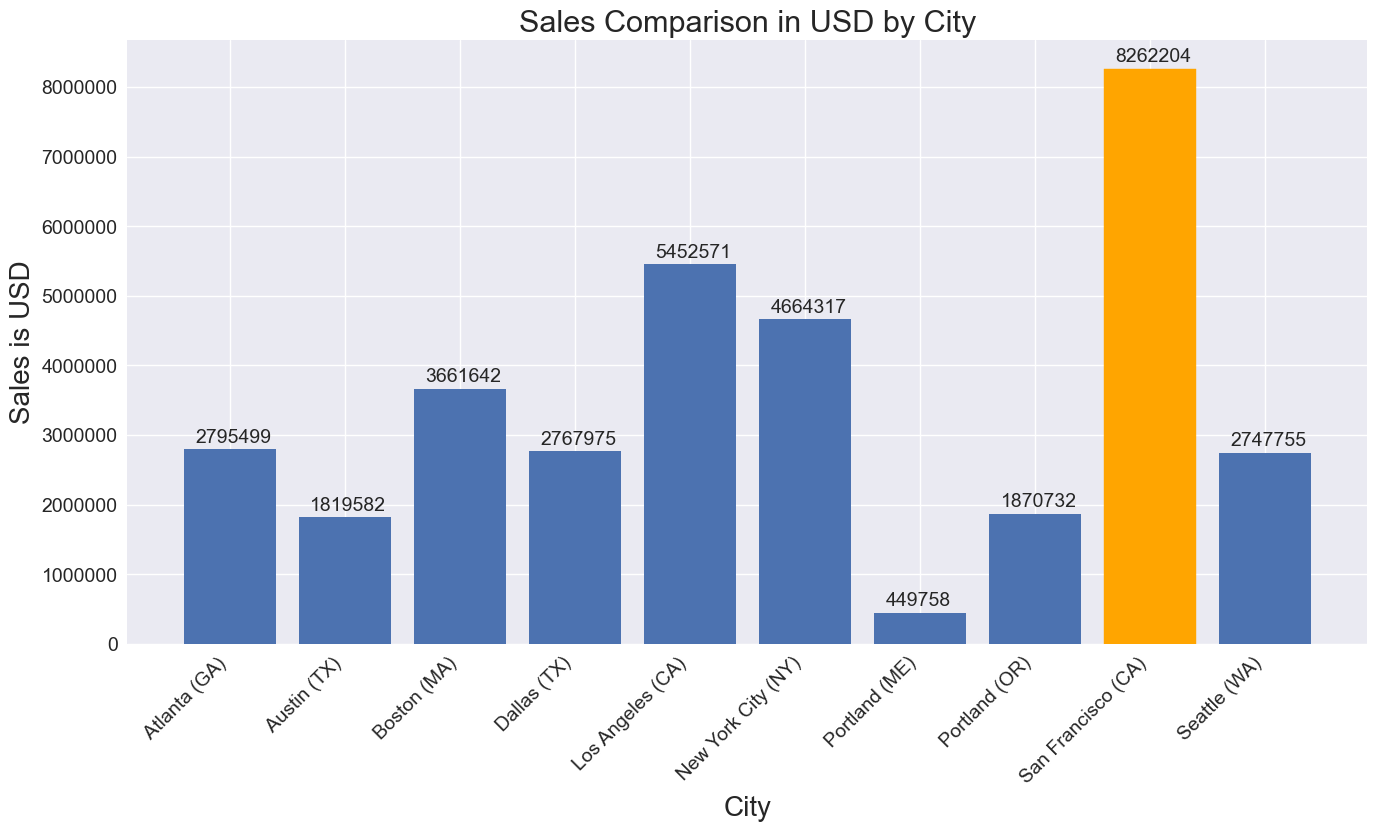

In [27]:
## Graphical Analysis

x = df.groupby("City").sum()["Sales"].index.to_list() ## Grab the cities from the index and put in as a list
y = df.groupby("City").sum()["Sales"]

x_index = np.arange(len(x))

plt.style.use("seaborn")
plt.figure(figsize=(16,8),dpi=100)

bar = plt.bar(x_index,y)
bar[-2].set_color("orange")

## Format Setting
plt.ticklabel_format(style='plain') ## Disable scientific notation

## Title & Axis Setting
plt.tick_params(labelsize=14)
plt.xticks(x_index,x, rotation=45, ha="right")
plt.xlabel("City", fontsize=20)
plt.ylabel("Sales is USD", fontsize=20)
plt.title("Sales Comparison in USD by City",fontsize=22)

## Chart labelling
for x,y in zip(x_index,y):
    plt.text(x-0.3,y+100000,s=round(y),fontsize=14)

plt.show()

### Answer for Q2

In [28]:
city_top_sales = df.groupby("City").sum()["Sales"].idxmax()

print(f"The city with the number of highest sales is: {city_top_sales}")
print(f'The sales amount is: ${round(df.groupby("City").sum()["Sales"].loc[city_top_sales])}')

The city with the number of highest sales is:  San Francisco (CA)
The sales amount is: $8262204


### Q3 What time should we display advertisements to maximize likelihood of customer buying products?

In [148]:
df.groupby("Hour").count().head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Count,Grouped
Hour,,,,,,,,,,,
0,295,295,295,295,295,295,295,295,295,295,295
1,187,187,187,187,187,187,187,187,187,187,187
2,91,91,91,91,91,91,91,91,91,91,91
3,52,52,52,52,52,52,52,52,52,52,52
4,80,80,80,80,80,80,80,80,80,80,80


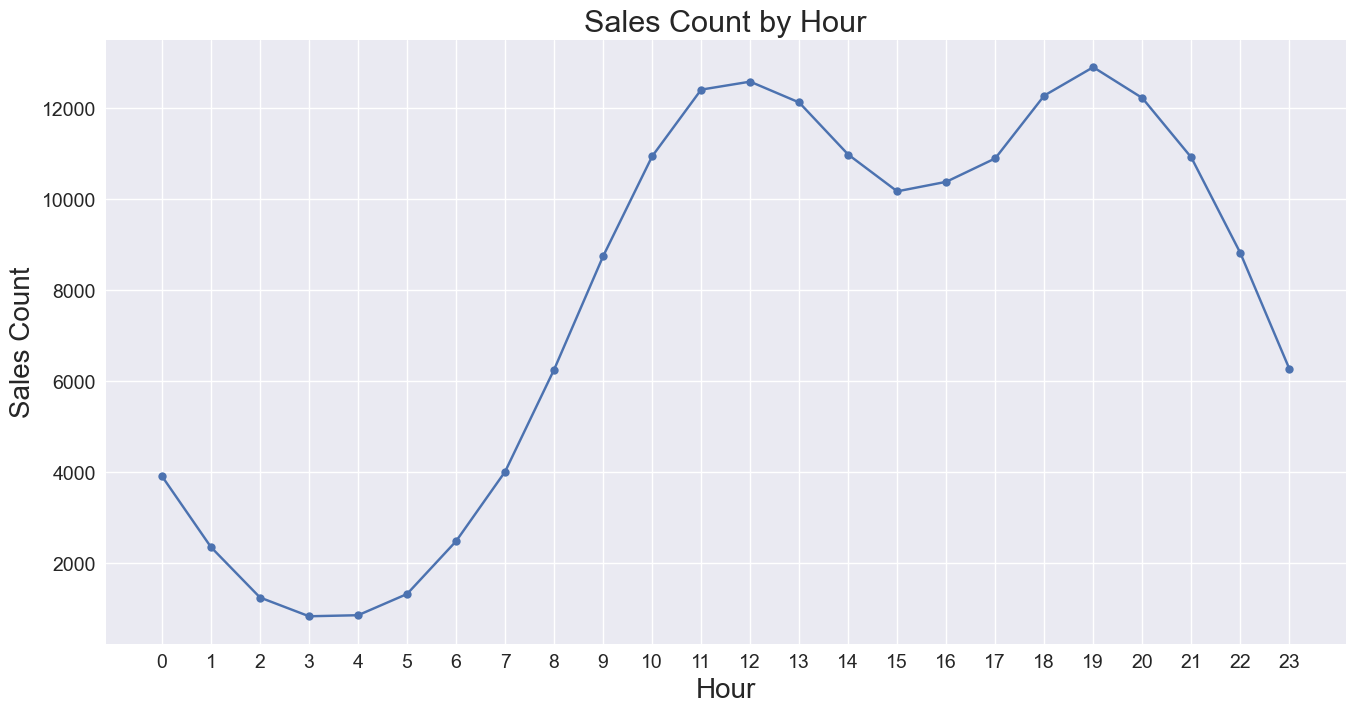

In [30]:
## Graphical Analysis
x = df.groupby("Hour").sum().index.tolist()
y = df.groupby("Hour").count()["Quantity Ordered"]


plt.style.use("seaborn")
plt.figure(figsize=(16,8),dpi=100)

plt.plot(x,y,marker=".", markersize=12)

## Title & Axis Setting
plt.tick_params(labelsize=14)
plt.xticks(x)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Sales Count", fontsize=20)
plt.title("Sales Count by Hour",fontsize=22)


plt.show()

### Answer for Q3

In [31]:
print("By referring to the graph, we can actually make various decision.\n")
print("Decision 1: Focus the advertisement on the peak hour which are 12pm and 7pm,"
      + "most probably people will visit the shop during the break time or after work.\n")
print("Decision 2: Focus on the low peak hour to stimulate people desire to purchase.")

By referring to the graph, we can actually make various decision.

Decision 1: Focus the advertisement on the peak hour which are 12pm and 7pm,most probably people will visit the shop during the break time or after work.

Decision 2: Focus on the low peak hour to stimulate people desire to purchase.


### EXTRA: To create the Sales Count Chart for each of the city

In [32]:
df["Count"] = 1
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,1


In [85]:
city_sales_df = df.groupby(["Hour","City"]).agg({"Count":sum}).reset_index()
city_sales_df.head()

,Hour,City,Count
0,0,Atlanta (GA),310
1,0,Austin (TX),198
2,0,Boston (MA),426
3,0,Dallas (TX),285
4,0,Los Angeles (CA),637


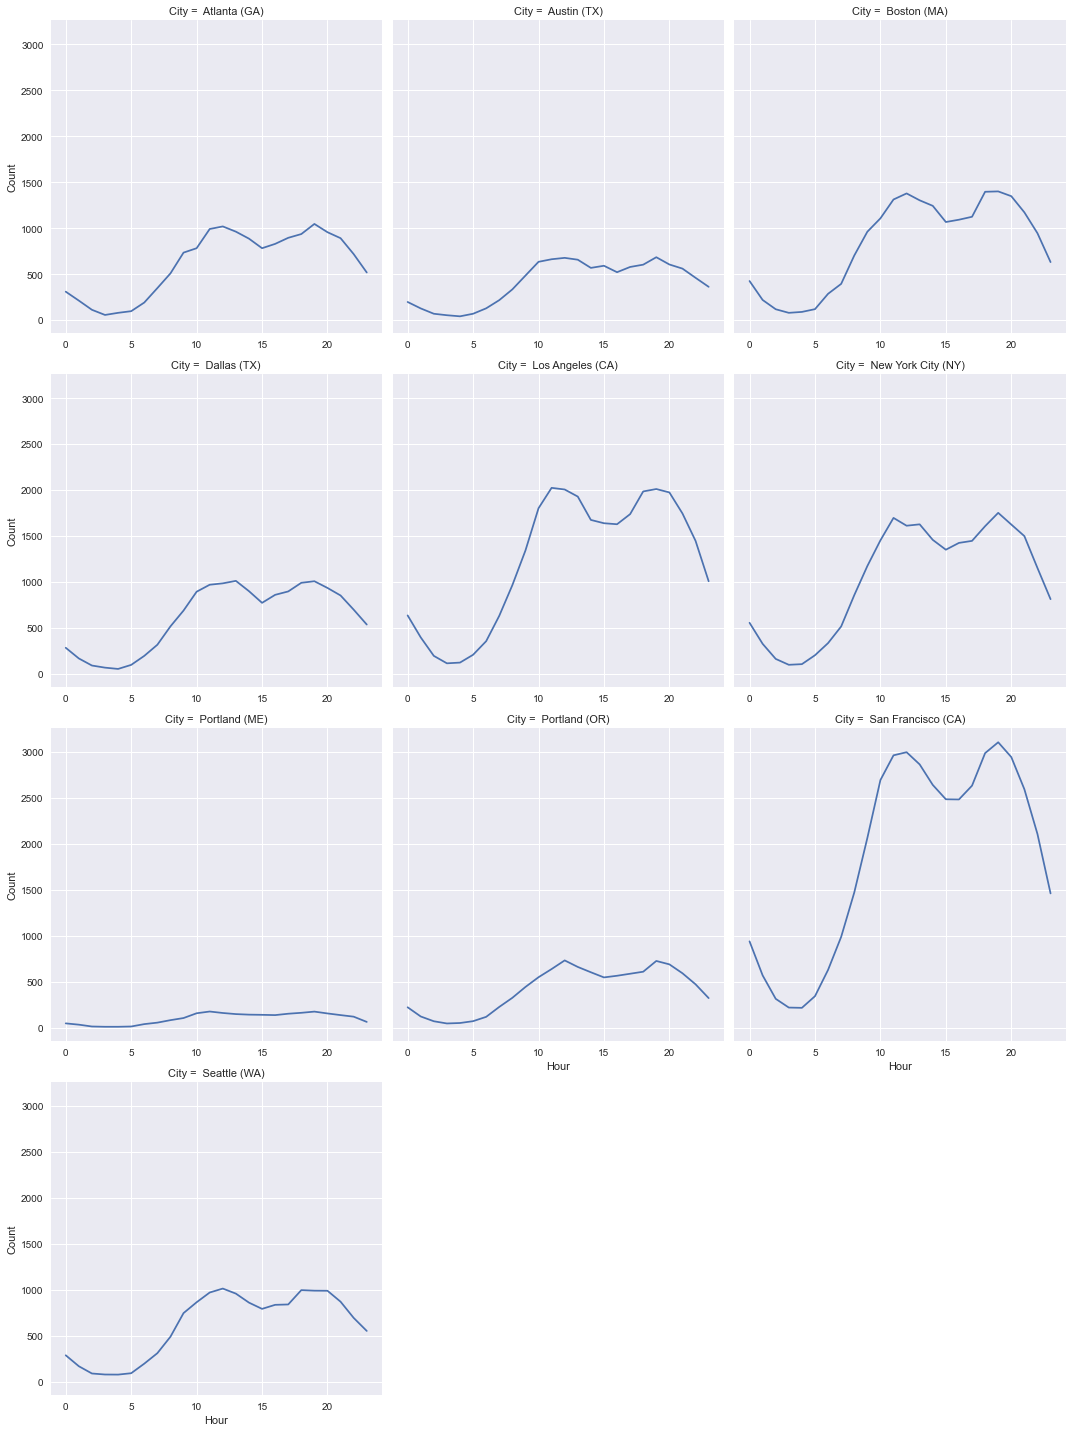

In [86]:
import seaborn as sns

g = sns.FacetGrid(data=city_sales_df, col="City", col_wrap=3, sharex=False, height=5, aspect=1)
g.map(plt.plot, "Hour", "Count")

plt.show()

### Q4 What Products are most often sold together?

In [87]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,1


In [92]:
## Remain the duplcated row
df = df[df["Order ID"].duplicated(keep=False)]
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Count
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,1
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,1
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,1
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,1
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,1
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (CA),17,1
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,1
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City (NY),11,1


In [99]:
## Grouped all the same order id items into "Grouped" column
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Count,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [100]:
product_df = df[["Order ID","Grouped"]].drop_duplicates()
product_df

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [131]:
from itertools import combinations
from collections import Counter

count = Counter()

product_list = []
count_list = []

for row in product_df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
## To create chart
for key, value in count.most_common(15):
    product_list.append(", ".join(key))
    count_list.append(value)

In [130]:
count.most_common(15)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77),
 (('Apple Airpods Headphones', 'Wired Headphones'), 69),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 58)]

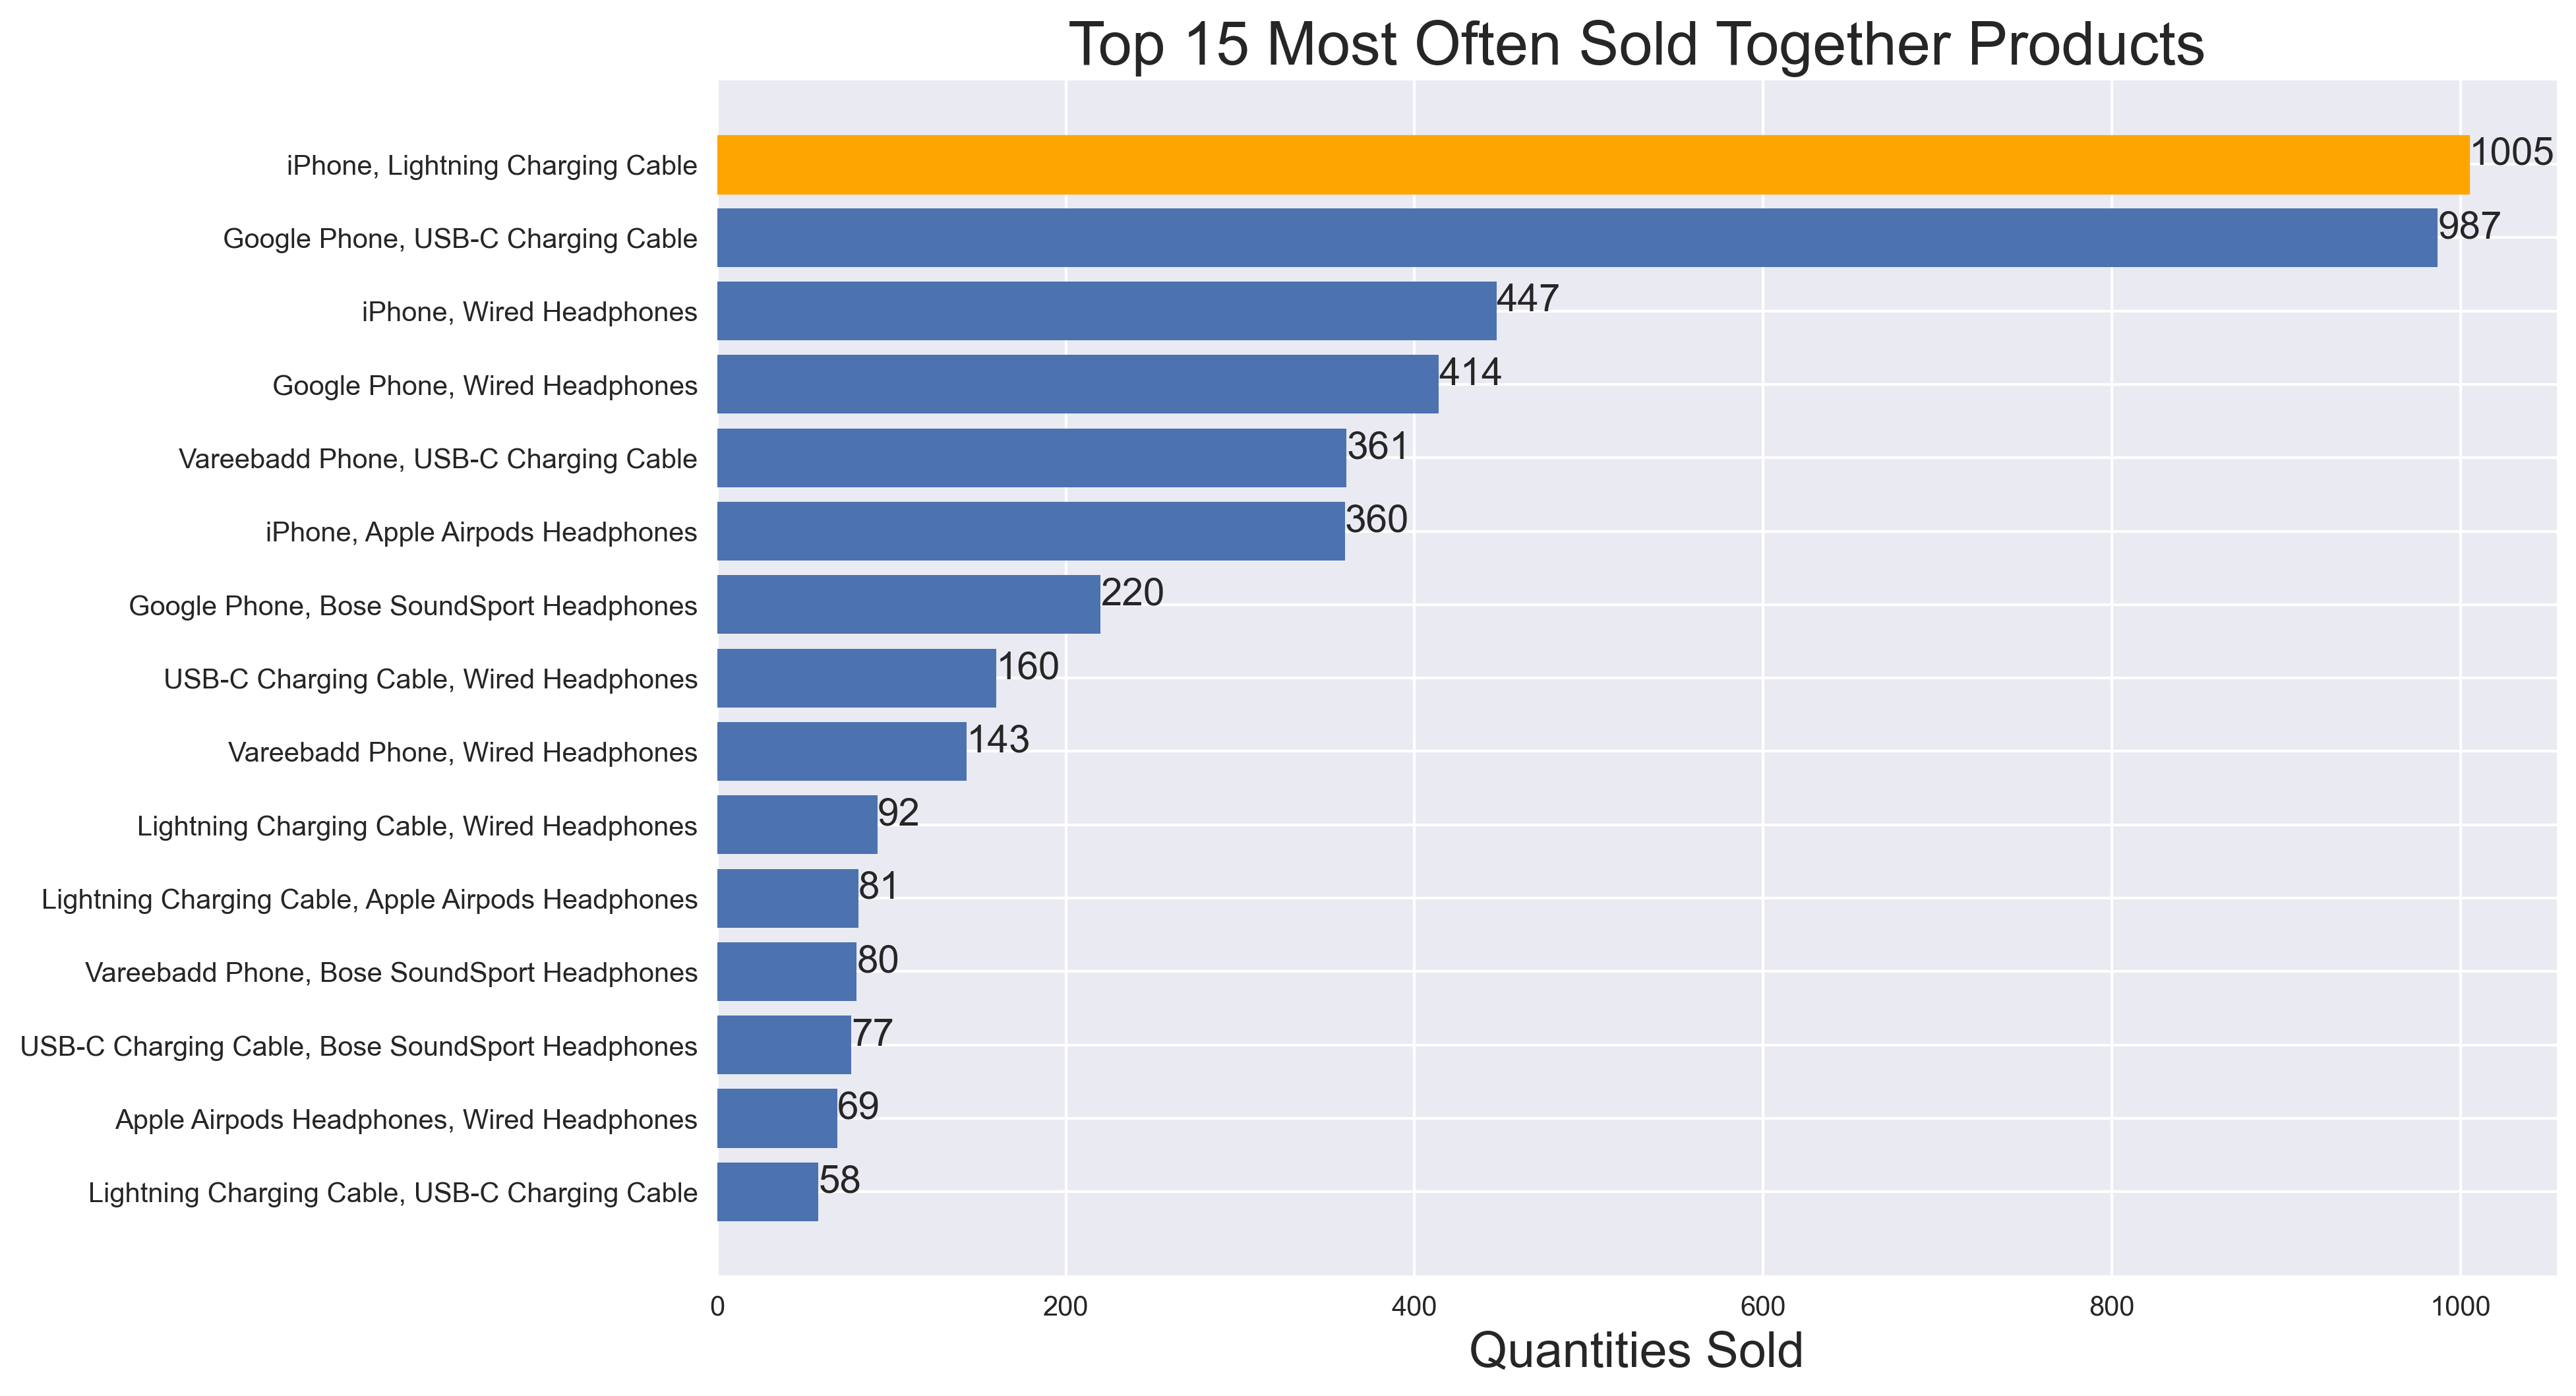

In [205]:
## Graphical Analysis
plt.style.use("seaborn")
plt.figure(figsize=(12,8),dpi=300)

y = product_list[::-1]
y_index = np.arange(len(y))
x = count_list[::-1]

bar = plt.barh(y_index,x)
bar[-1].set_color("orange")

## Title & Axis Setting
plt.title("Top 15 Most Often Sold Together Products", fontsize=22)
plt.yticks(y_index,y)
plt.xlabel("Quantities Sold", fontsize=18)

## Chart Value Plotting
for x,y in zip(x, y_index):
    plt.text(x=x,y=y,s=x, fontsize=14)

plt.show()

### Answer for Q4

In [234]:
print("By referring the data and the chart, the products most often sold together is " + 
      product_list[0] +
     " with the quantities of " +
      str(count_list[0]) + "."
     )

By referring the data and the chart, the products most often sold together is iPhone, Lightning Charging Cable with the quantities of 1005.


### Q5 What product sold the most? Why do you think it did?

#### Method 1 Horizontal Bar (Without showing the relationship of the unit price)

In [198]:
df.groupby("Product")["Quantity Ordered"].sum().sort_values(ascending=False)

Product
USB-C Charging Cable          2292
Lightning Charging Cable      1949
iPhone                        1867
Wired Headphones              1825
Google Phone                  1642
AAA Batteries (4-pack)        1251
AA Batteries (4-pack)         1013
Apple Airpods Headphones       982
Bose SoundSport Headphones     827
Vareebadd Phone                602
27in FHD Monitor               298
27in 4K Gaming Monitor         251
34in Ultrawide Monitor         247
Macbook Pro Laptop             197
Flatscreen TV                  179
ThinkPad Laptop                176
20in Monitor                   161
LG Washing Machine              28
LG Dryer                        25
Name: Quantity Ordered, dtype: int64

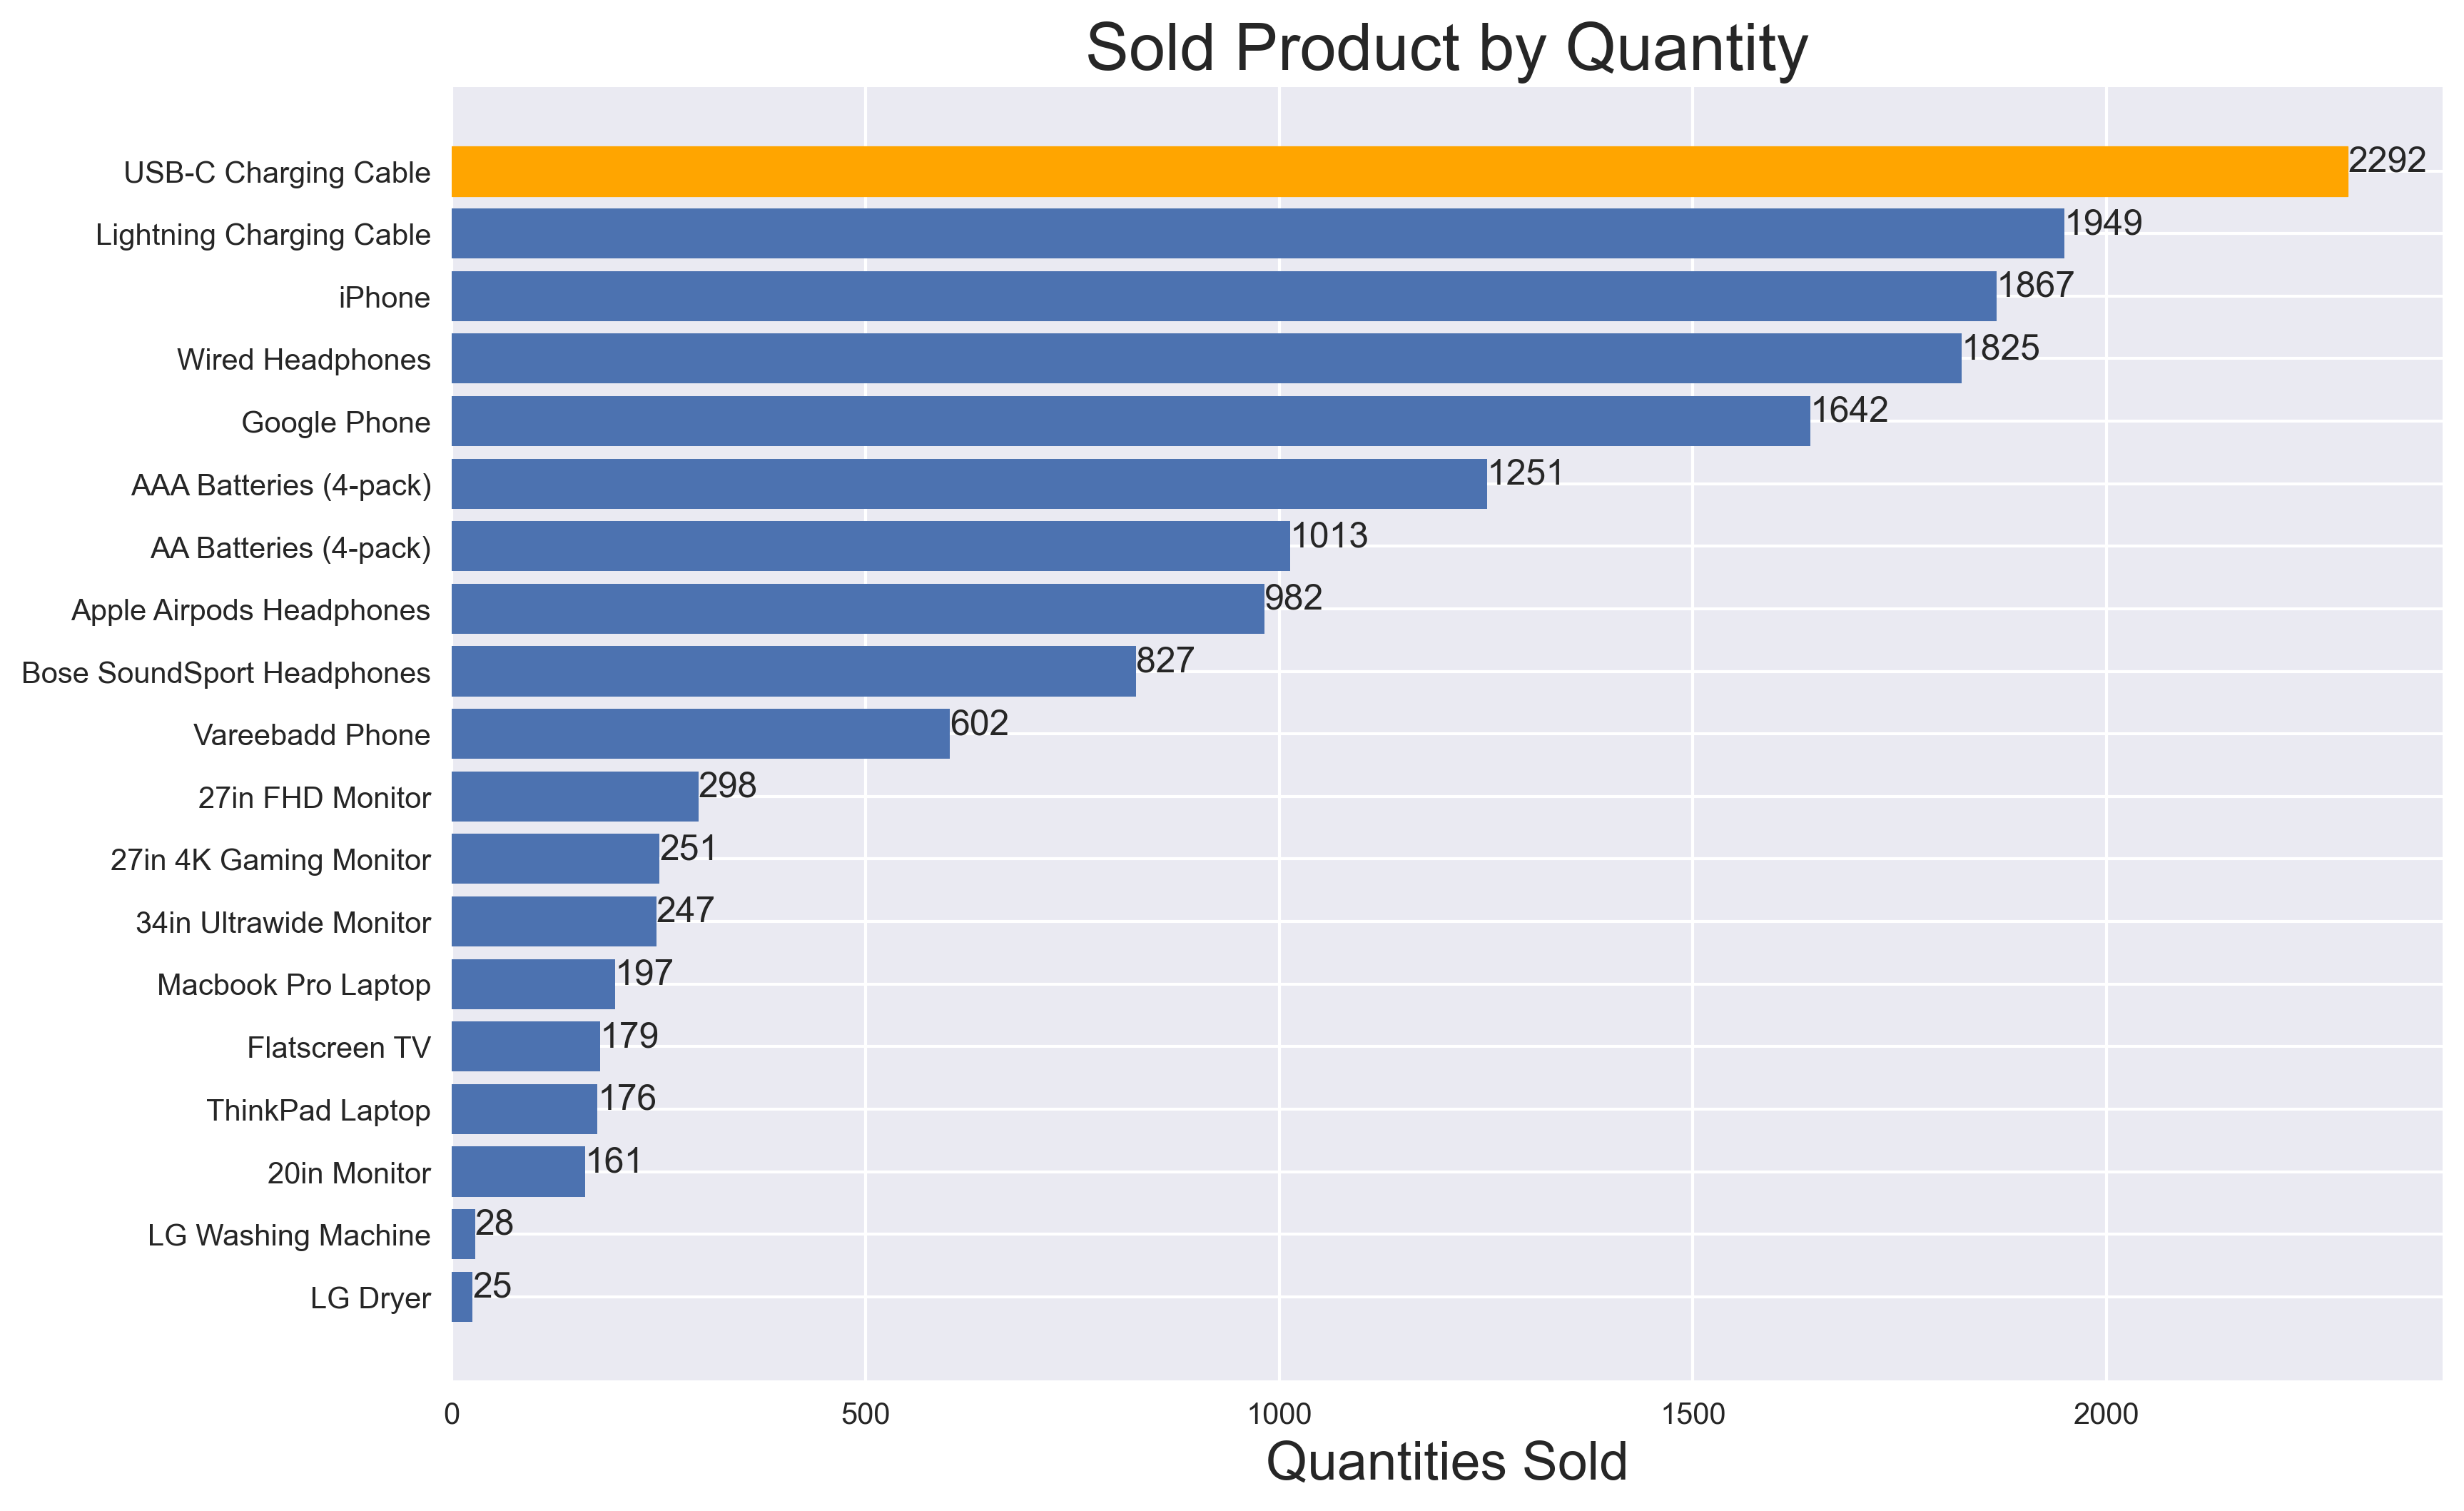

In [214]:
plt.style.use("seaborn")
plt.figure(figsize=(12,8),dpi=300)

y = df.groupby("Product")["Quantity Ordered"].sum().sort_values(ascending=False).index.tolist()[::-1]
y_index = np.arange(len(y))
x = df.groupby("Product")["Quantity Ordered"].sum().sort_values(ascending=False).values[::-1]

bar = plt.barh(y_index,x)
bar[-1].set_color("orange")


## Title & Axis Setting
plt.title("Sold Product by Quantity", fontsize=22)
plt.yticks(y_index,y)
plt.xlabel("Quantities Sold", fontsize=18)

for x, y in zip(x, y_index):
    plt.text(x=x,y=y,s=x, fontsize=12)

plt.show()

#### Method 2 Vertical Bar + Line Chart to show the relationship

In [209]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Count,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


<ipython-input-233-8d88afbda500>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x,rotation="vertical",size=12)


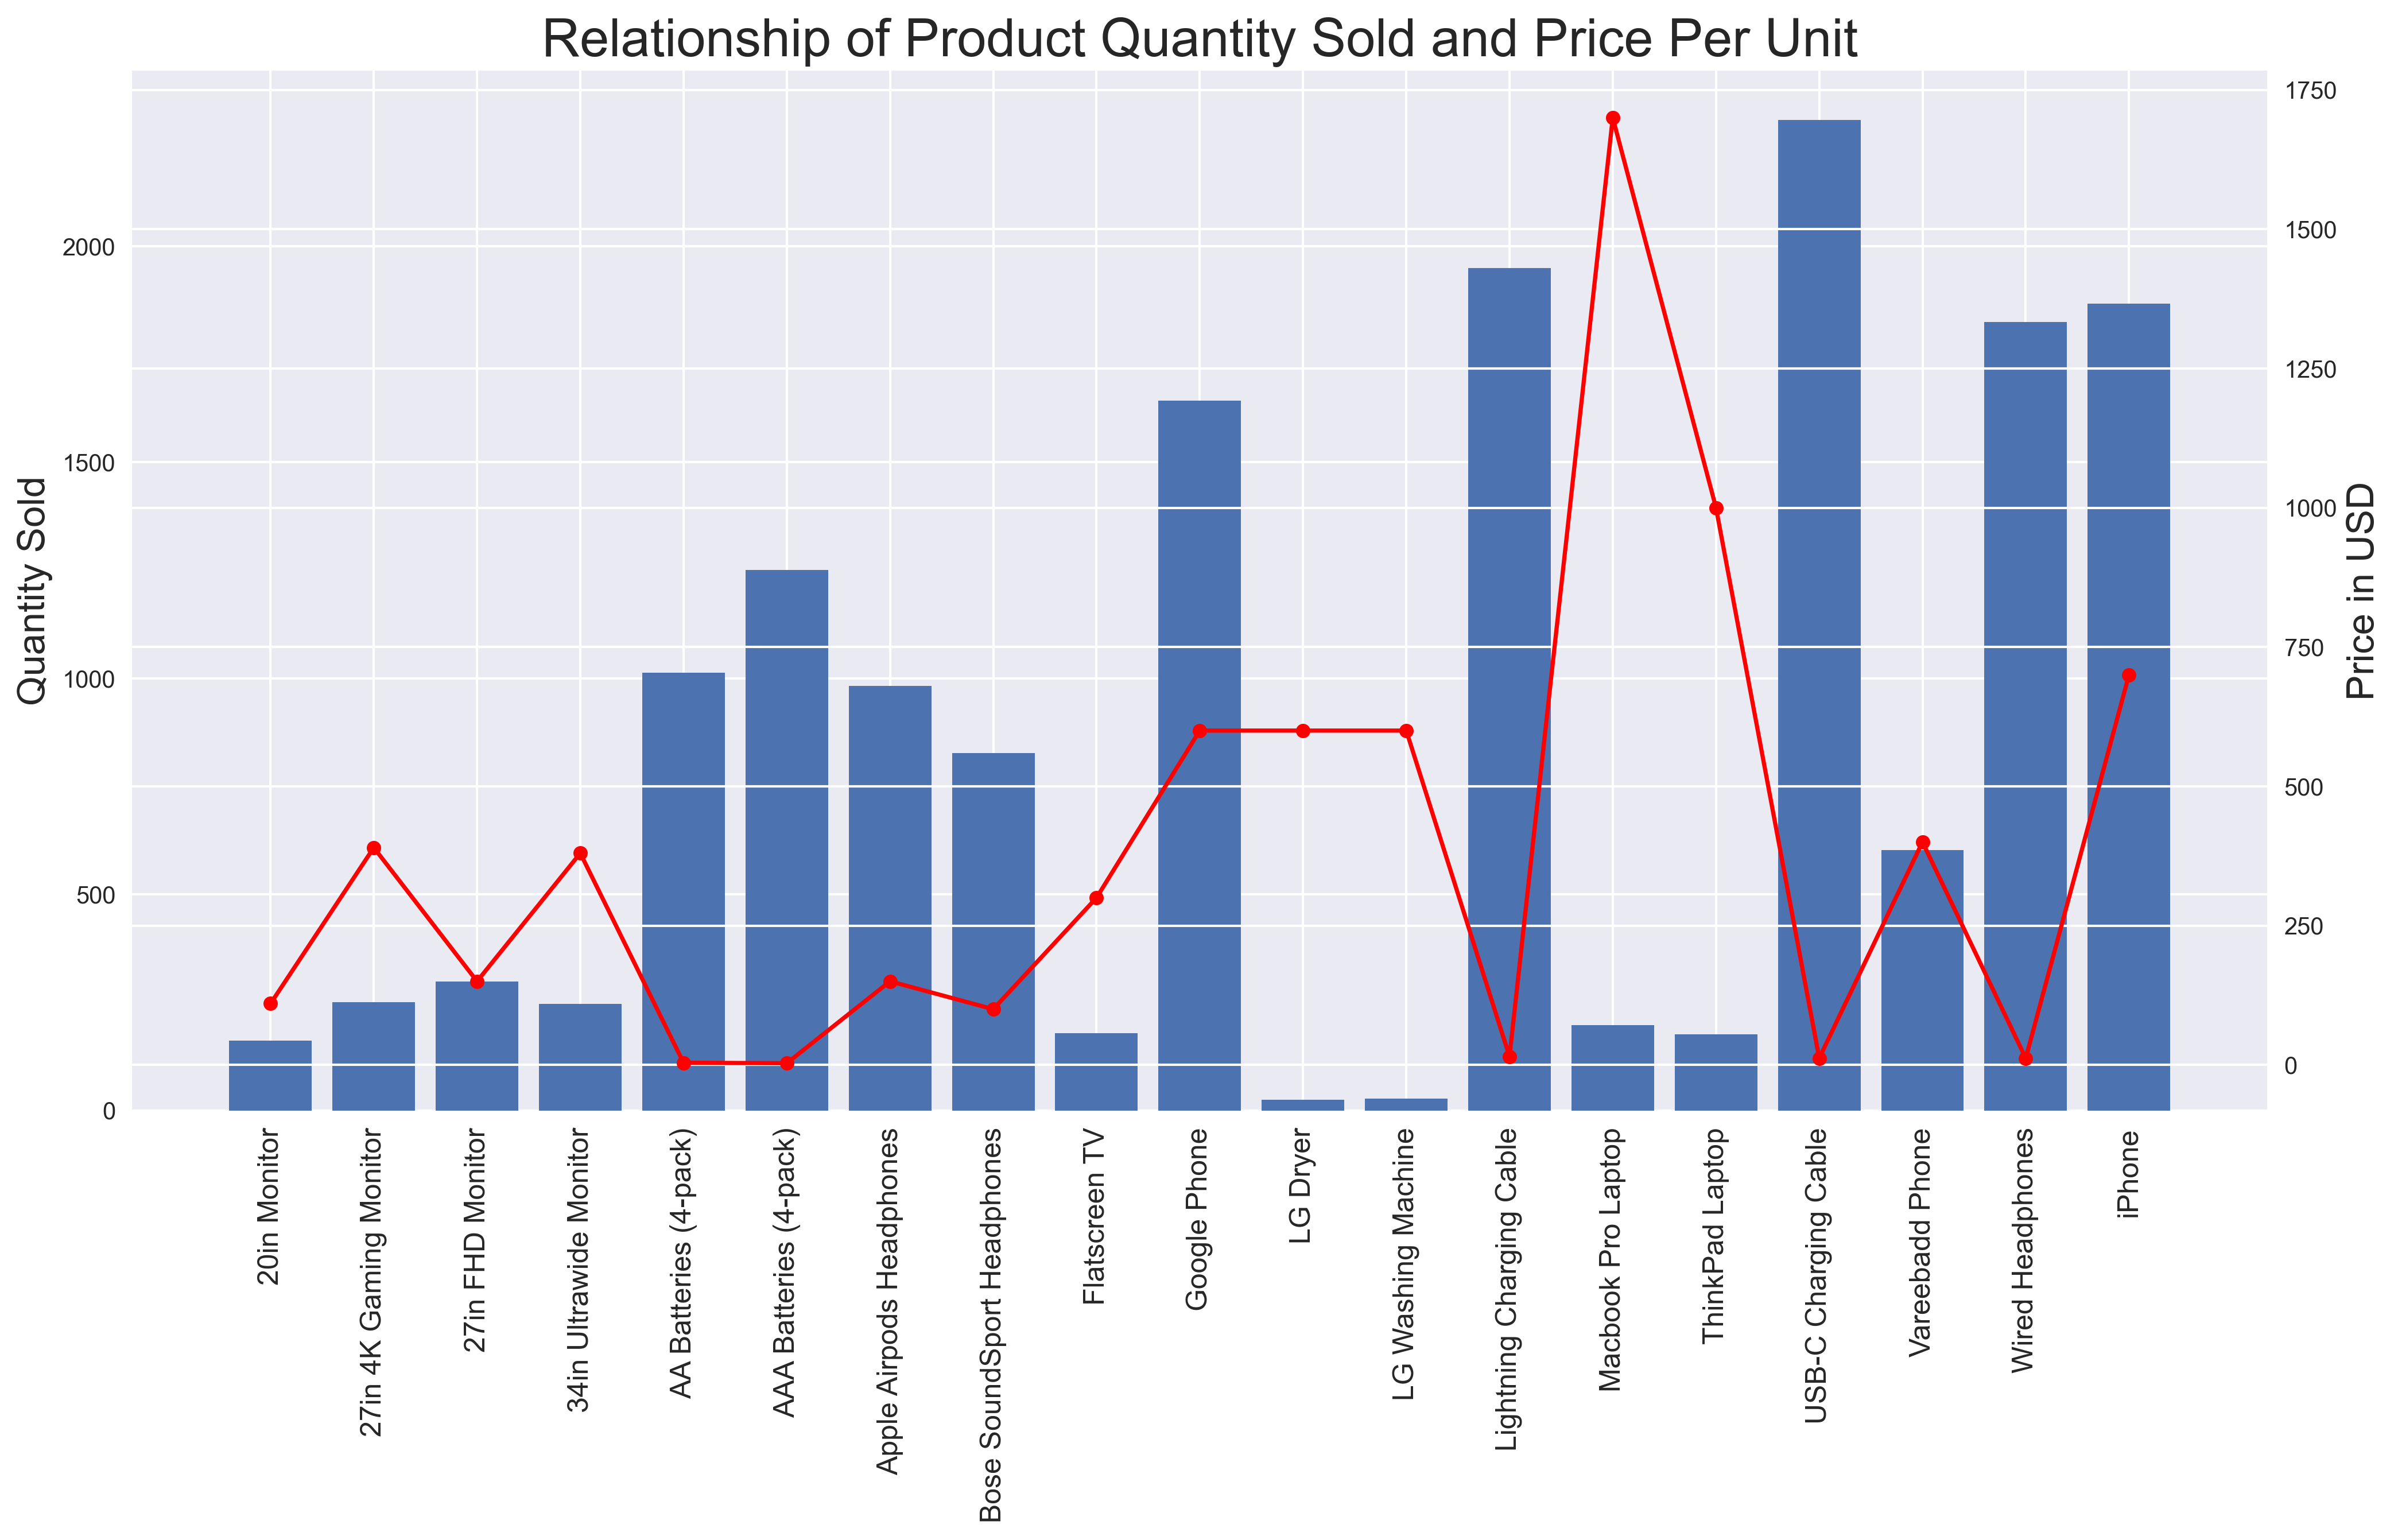

In [233]:
x = [product for product, df in df.groupby("Product")]
y1 = df.groupby("Product")["Quantity Ordered"].sum()
y2 = df.groupby("Product")["Price Each"].mean()

fig, ax1 = plt.subplots(figsize=(16,8),dpi=300)
ax2 = ax1.twinx()

ax1.bar(x,y1)
ax2.plot(x,y2,"r", marker=".", markersize=12)

ax1.set_xticklabels(x,rotation="vertical",size=12)
ax1.set_ylabel("Quantity Sold", fontsize=16)
ax2.set_ylabel("Price in USD", fontsize=16)

plt.title("Relationship of Product Quantity Sold and Price Per Unit", fontsize=22)


plt.show()

### Answer for Q5

In [235]:
print("By referring to graph we can actually awared the product sold the most is USB-C Charging Cable because the price is low.")

By referring to graph we can actually awared the product sold the most is USB-C Charging Cable because the price is low.
